# Political Donation History Of Wealthy Sports

This is an analysis that I use as an excercise for developing my Pandas skills, to speed up data analysis and viz prototyping for occasional articles.

The source of the data is [Kaggle](https://www.kaggle.com/yamqwe/political-donation-history-of-wealthy-sports-owne)

### Importing functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Reading the data

In [3]:
donations = pd.read_csv('sports-political-donations.csv')

In [4]:
donations.head(20)

,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000",2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800",2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,"$2,700",2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700",2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700",2020,Democrat
5,Adam Silver,Commissioner,NBA,KOHL FOR CONGRESS,"$2,000",2018,Democrat
6,Adam Silver,Commissioner,NBA,BETO FOR TEXAS,"$1,000",2018,Democrat
7,Adam Silver,Commissioner,NBA,MONTANANS FOR TESTER,"$1,000",2018,Democrat
8,Adam Silver,Commissioner,NBA,SERVE AMERICA PAC,"$1,000",2018,Democrat
9,Adam Silver,Commissioner,NBA,ADAM SCHLEIFER FOR CONGRESS,"$1,000",2020,Democrat


We can see that the dataset has been correctly indexed, but we can use some more tweaks and code to better analyze the data.

### General info about the dataset

In [5]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Owner          2798 non-null   object
 1   Team           2798 non-null   object
 2   League         2798 non-null   object
 3   Recipient      2798 non-null   object
 4   Amount         2798 non-null   object
 5   Election Year  2798 non-null   int64 
 6   Party          2789 non-null   object
dtypes: int64(1), object(6)
memory usage: 153.1+ KB


In [6]:
donations.isnull().value_counts()

Owner  Team   League  Recipient  Amount  Election Year  Party
False  False  False   False      False   False          False    2789
                                                        True        9
dtype: int64

In [7]:
donations.loc[donations['Party'].isnull()]

,Owner,Team,League,Recipient,Amount,Election Year,Party
12,Alan Smolinisky,Los Angeles Dodgers,MLB,Americans for Tomorrow's Future,"$10,000",2020,NaN
919,Herbert Simon,"Indiana Pacers, Indiana Fever","NBA, WNBA",NEW GENERATION PAC,"$5,000",2016,NaN
1081,Jerry Reinsdorf,"Chicago Bulls, Chicago White Sox","NBA, MLB",GOVERN OR GO HOME,"$300,000",2018,NaN
1082,Jerry Reinsdorf,"Chicago Bulls, Chicago White Sox","NBA, MLB",UNITED TOGETHER,"$300,000",2018,NaN
1084,Jerry Reinsdorf,"Chicago Bulls, Chicago White Sox","NBA, MLB","UNITED FOR PROGRESS, INC.","$200,000",2018,NaN
1206,Jimmy and Susan Haslam,Cleveland Browns,NFL,CLEVELAND FORWARD PAC,"$20,000",2018,NaN
1807,Laura Ricketts,Chicago Cubs,MLB,JILL STEIN FOR PRESIDENT,"$2,700",2016,NaN
1879,Mark Attanasio,Milwaukee Brewers,MLB,Loan Syndications and Trading Association PAC,"$1,250",2020,NaN
2407,Robert Sarver,"Phoenix Suns, Phoenix Mercury","NBA, WNBA",AMERICANS FOR TOMORROW'S FUTURE,"$10,000",2020,NaN


We can see that there are some missing values, we can fill them with a more fitting description.

In [8]:
donations.loc[:, 'Party'] = donations.loc[:, 'Party'].fillna('Not available')

In [9]:
donations.loc[:, 'Party'].unique()

array(['Democrat', 'Not available', 'Bipartisan', 'Republican',
       'Bipartisan, but mostly Republican',
       'Bipartisan, but mostly Democratic', 'Independent'], dtype=object)

To be able to compute the number as an amount, we have to stript it from the unnecessary characters.

In [10]:
pd.to_numeric(donations.loc[:, 'Amount'], errors='coerce')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2793   NaN
2794   NaN
2795   NaN
2796   NaN
2797   NaN
Name: Amount, Length: 2798, dtype: float64

In [11]:
donations.loc[:, 'Amount'] = donations.loc[:, 'Amount'].str.strip('$')
donations.loc[:, 'Amount'] = donations.loc[:, 'Amount'].str.replace(',','')

In [12]:
donations.loc[:, 'Amount'] = pd.to_numeric(donations.loc[:, 'Amount'])

In [13]:
donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Owner          2798 non-null   object
 1   Team           2798 non-null   object
 2   League         2798 non-null   object
 3   Recipient      2798 non-null   object
 4   Amount         2798 non-null   int64 
 5   Election Year  2798 non-null   int64 
 6   Party          2798 non-null   object
dtypes: int64(2), object(5)
memory usage: 153.1+ KB


Now we can use some statistical methods to analyze the numeric data.

In [14]:
pd.set_option('float_format', '{:f}'.format) # to make numbers more readable

In [15]:
donations['Amount'].describe()

count      2798.000000
mean      16790.098999
std       77994.476911
min          36.000000
25%        2700.000000
50%        5000.000000
75%        5600.000000
max     1850000.000000
Name: Amount, dtype: float64

<AxesSubplot:title={'center':'Donations per league'}, xlabel='League'>

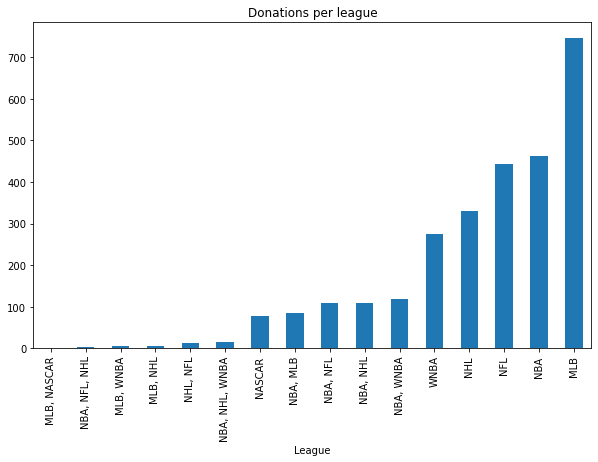

In [16]:
donations.groupby('League')['Amount'].count().sort_values().plot(kind='bar', title='Donations per league', figsize=(10, 6))

In [17]:
# filtering donations by the largest amount

over50 = donations[donations['Amount'] > 100000]


<AxesSubplot:title={'center':'Donations per owener'}, xlabel='Owner'>

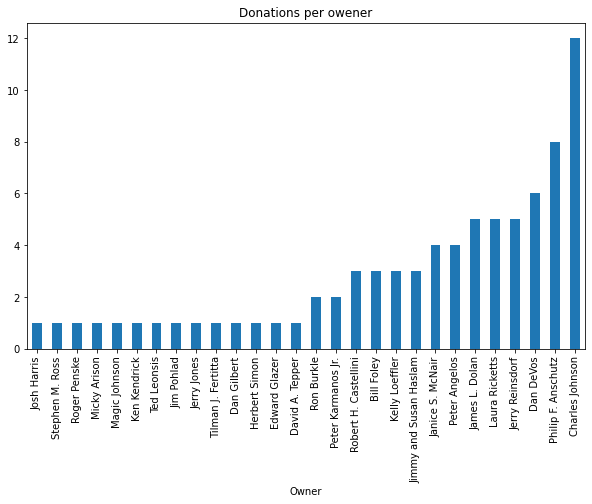

In [18]:
over50.groupby('Owner')['Amount'].count().sort_values().plot(kind='bar', title='Donations per owener', figsize=(10, 6))

<BarContainer object of 7 artists>

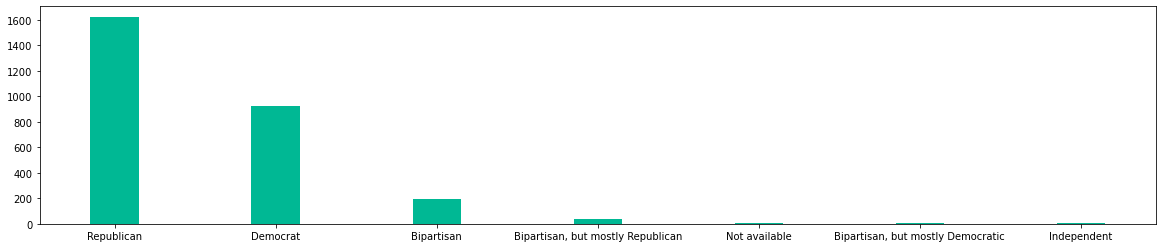

In [19]:
plt.figure(figsize=(20, 4))
barWidth = 0.3
plt.bar(donations.loc[:,'Party'].value_counts().index, donations.loc[:,'Party'].value_counts(), width=barWidth, color='#00b894')

<BarContainer object of 39 artists>

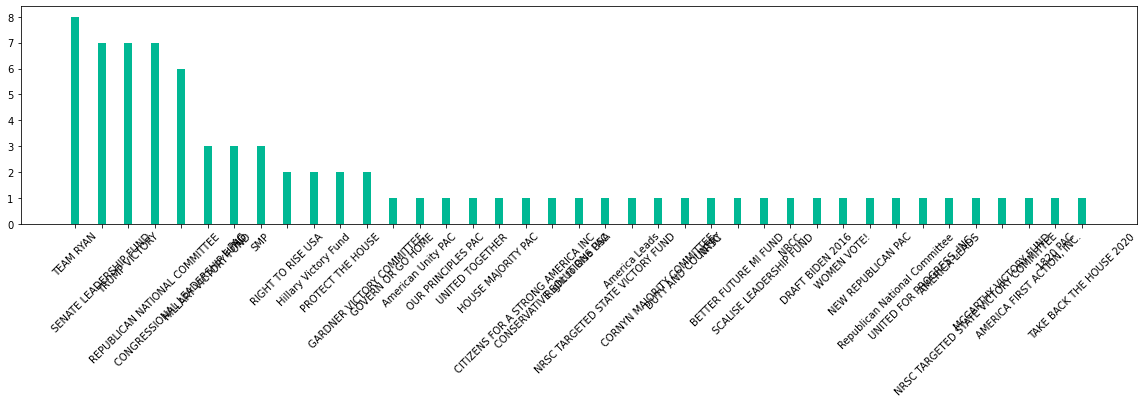

In [20]:
plt.figure(figsize=(20, 4))
barWidth = 0.3
plt.xticks(rotation=45)
plt.bar(over50.loc[:,'Recipient'].value_counts().index, over50.loc[:,'Recipient'].value_counts(), width=barWidth, color='#00b894')

<AxesSubplot:xlabel='Recipient'>

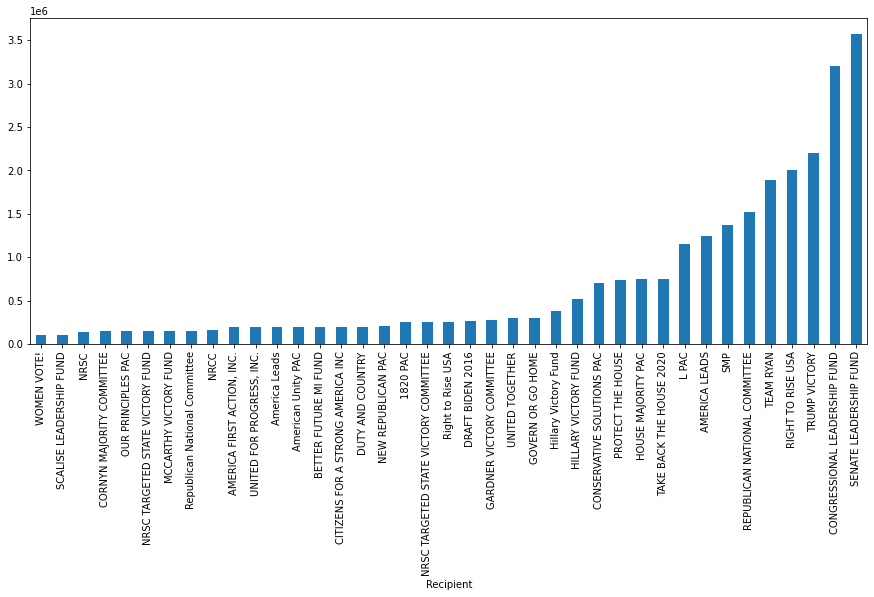

In [21]:
over50.groupby('Recipient')['Amount'].sum().sort_values().plot(kind='bar', figsize=(15, 6))

<AxesSubplot:xlabel='Recipient'>

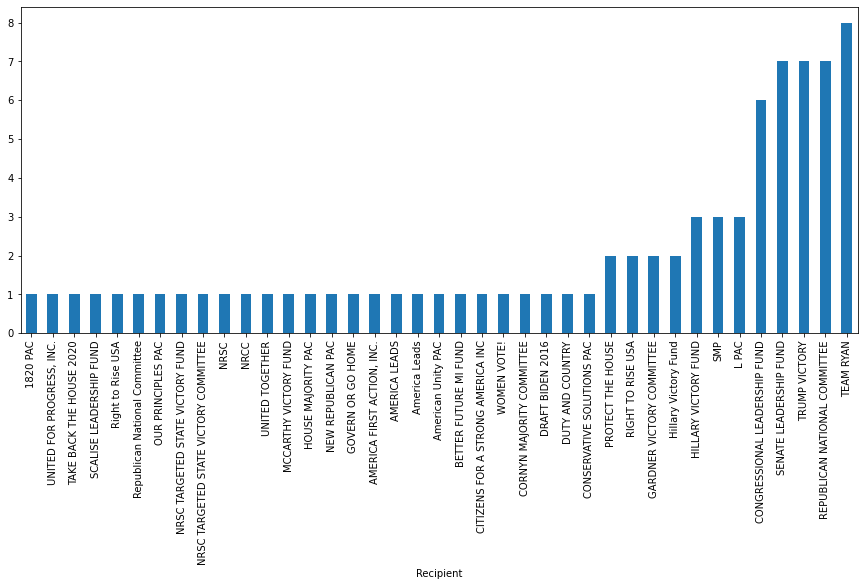

In [23]:
over50.groupby('Recipient')['Amount'].count().sort_values().plot(kind="bar", figsize=(15, 6))

<AxesSubplot:xlabel='Party'>

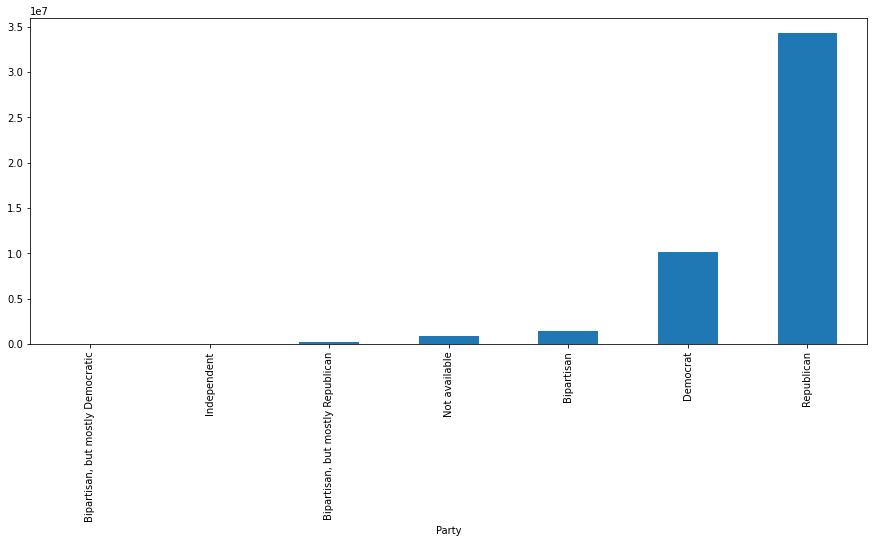

In [24]:
donations.groupby('Party')['Amount'].sum().sort_values().plot(kind="bar", figsize=(15, 6))

<AxesSubplot:xlabel='League'>

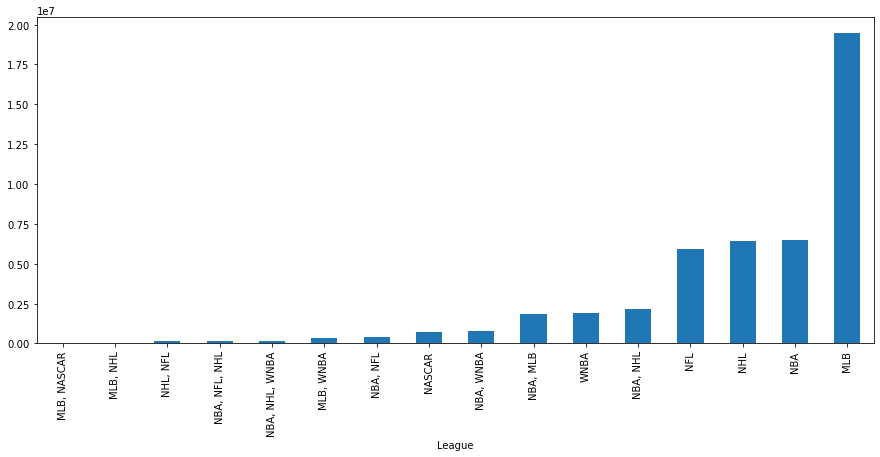

In [25]:
donations.groupby('League')['Amount'].sum().sort_values().plot(kind="bar", figsize=(15, 6))

<AxesSubplot:xlabel='Party,League'>

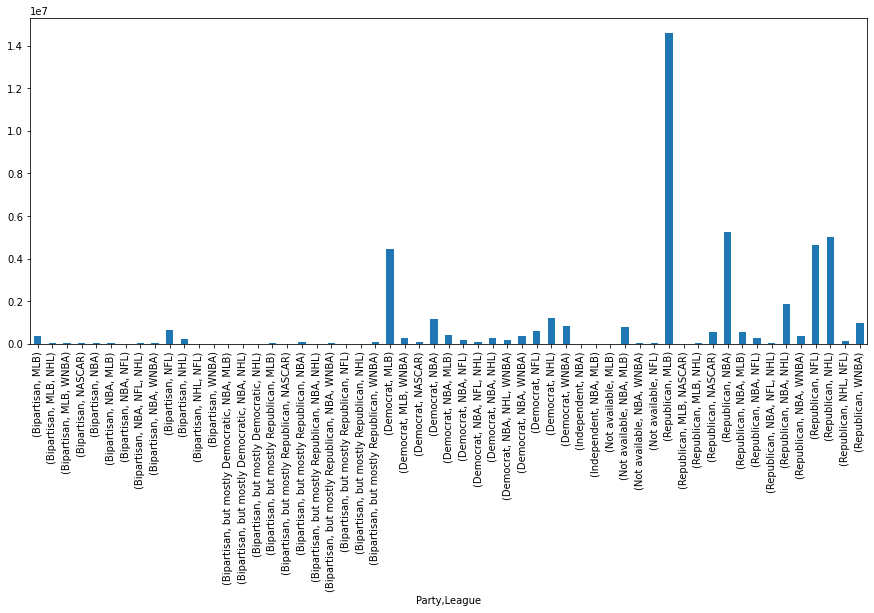

In [29]:
donations.groupby(['Party','League'])['Amount'].sum().plot(kind="bar", figsize=(15, 6))

<AxesSubplot:xlabel='Party,League'>

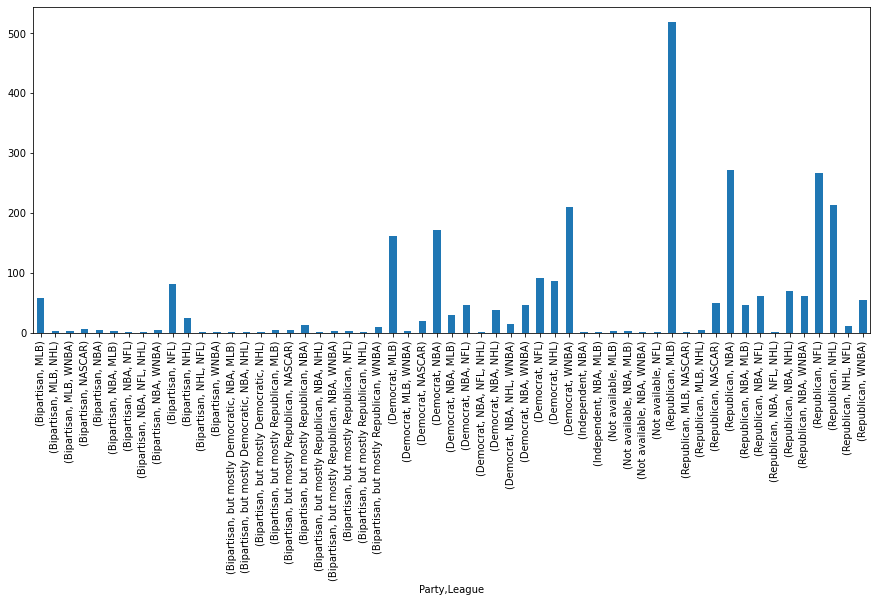

In [30]:
donations.groupby(['Party','League'])['Amount'].count().plot(kind="bar", figsize=(15, 6))